In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# TASK 1

df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


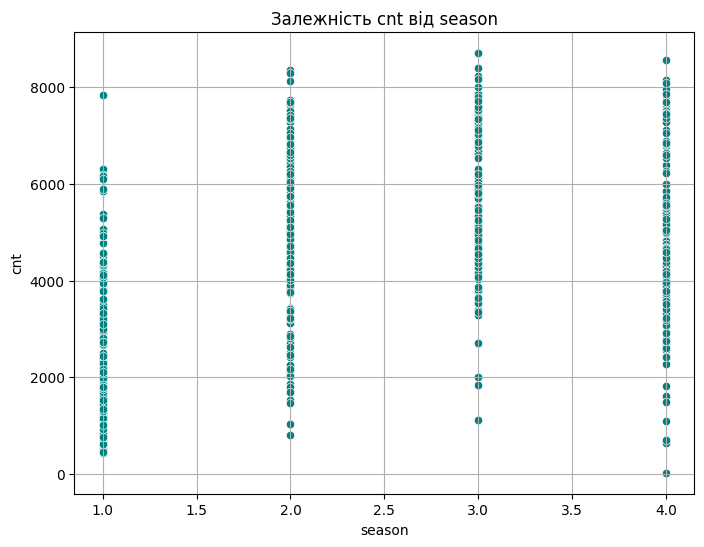

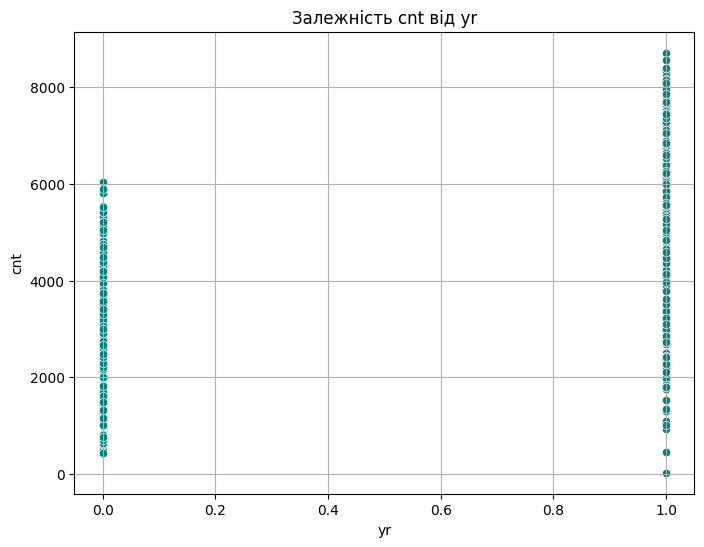

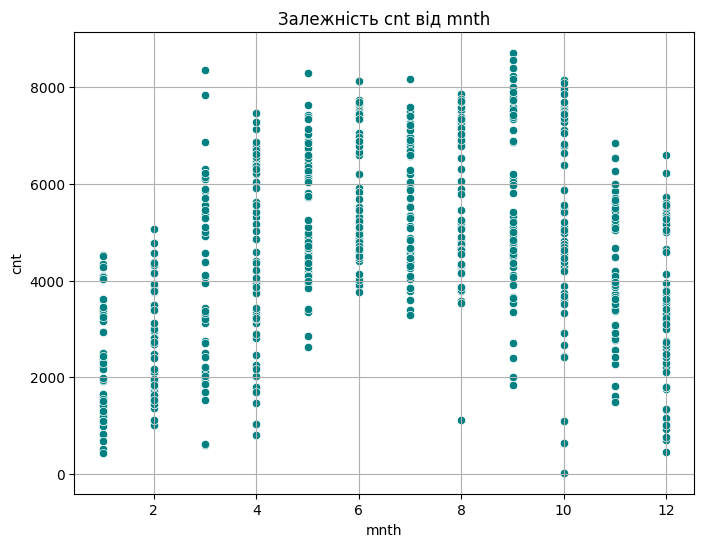

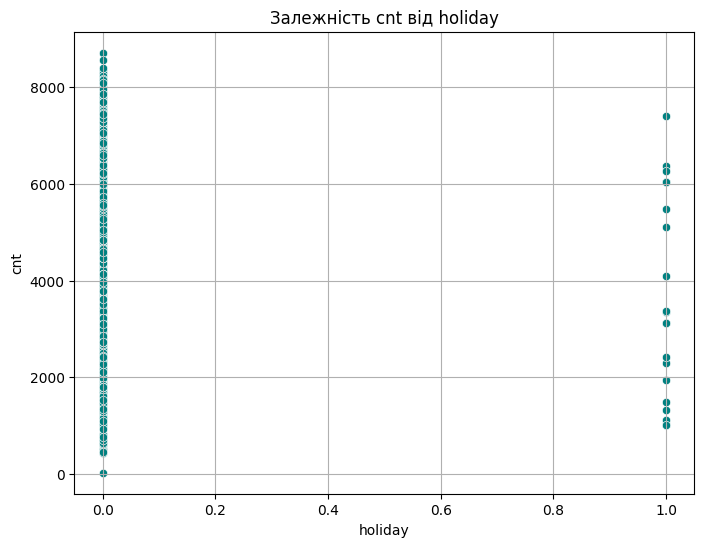

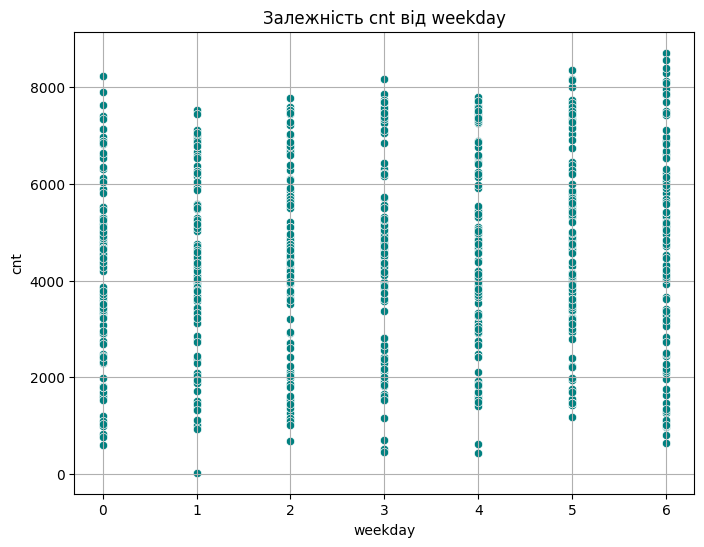

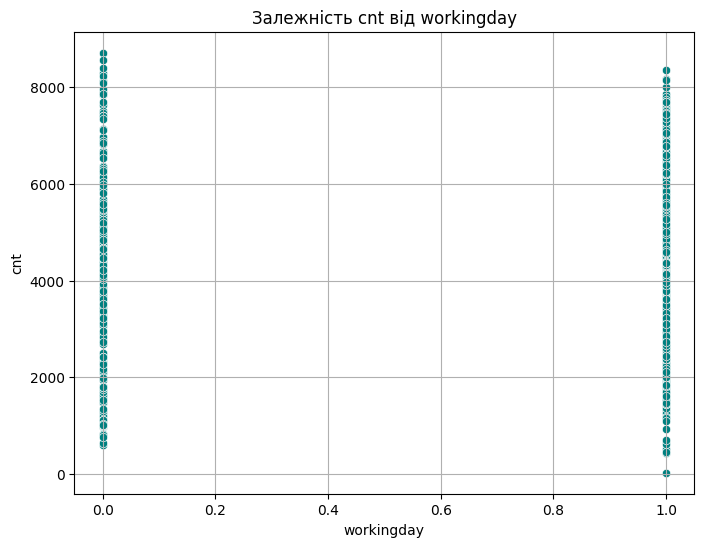

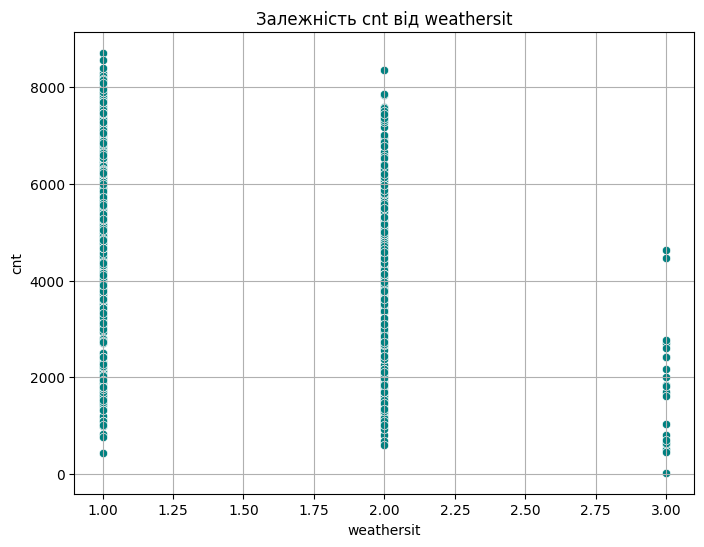

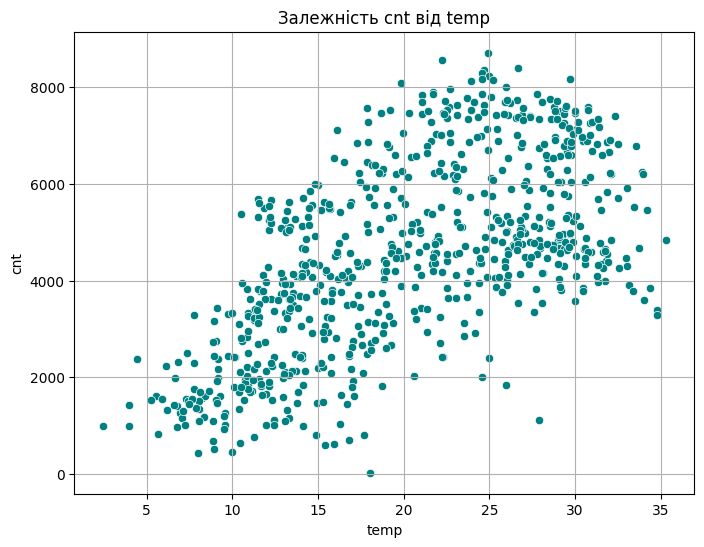

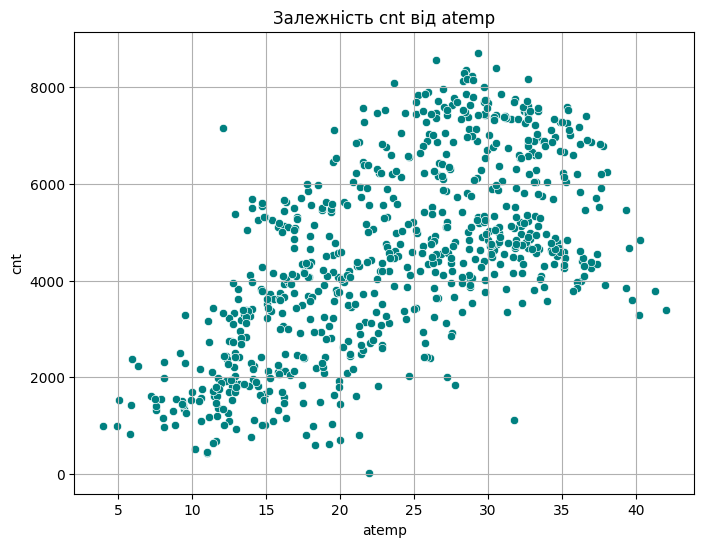

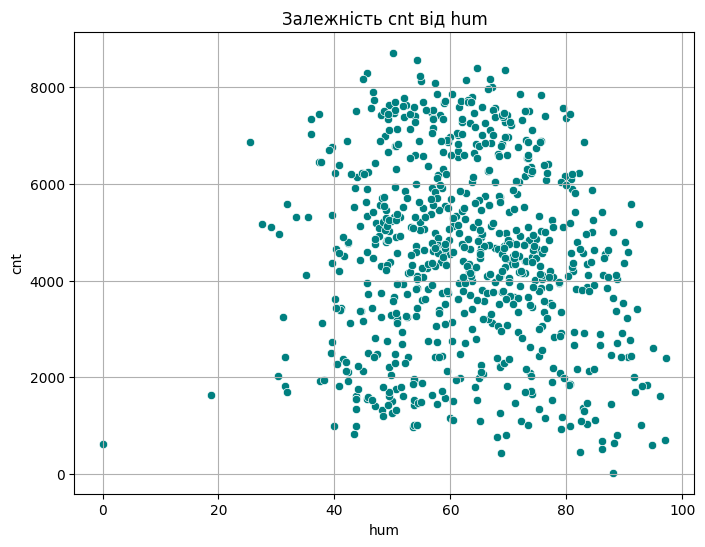

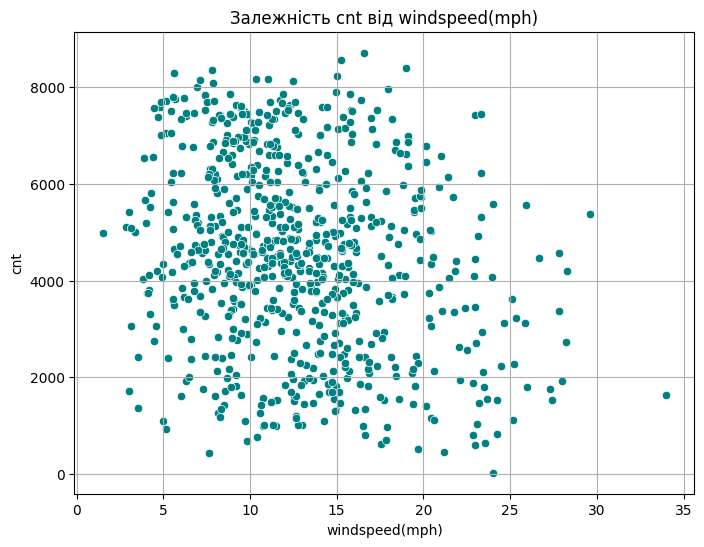

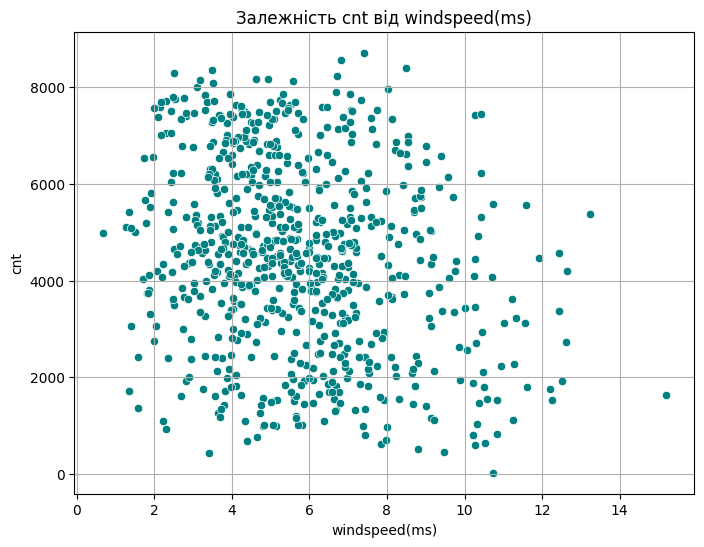

In [22]:
import seaborn as sns

attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
teal = '#008080'

for attr in attributes:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=attr, y='cnt', data=df, color=teal)
    plt.title(f'Залежність cnt від {attr}')
    plt.xlabel(attr)
    plt.ylabel('cnt')
    plt.grid(True)
    plt.show()

# You  can see from the graph that shows the dependence of the number of rentals
# on the month that this relationship is not linear. The  features that make the
# number of rentals depend on linearly are temperature (temp) and temperature by sensation (atemp).

Questions:
1. What is the nature of the relationship between the number of rentals and the month?
2. Indicate one or two features that most likely make the number of rentals depend on a linear relationship.

Answers:
1. From the graph that shows the dependence of the number of rolls on the month, you can see that this relationship is not linear.
However, you have mentioned that the attributes of temperature (temp) and temperature atemp may have a linear relationship with
the number of rentals. This may be a reasonable assumption, since temperature can have a direct impact on people's willingness to rent a bike.
The warmer the weather, the more people may be willing to use a bike share.
2. Temperature (temp): The temperature can have a direct linear impact on the number of bike rentals.
Warmer temperatures might lead to more people renting bikes for outdoor activities.
Temperature Sensation (atemp): Similar to temperature, the sensation of temperature can also influence the
number of bike rentals in a linear manner. People's perception of how hot or cold it feels can affect their decision to rent a bike.
These two features, temperature and temperature sensation, are likely to have a linear relationship with the
number of bike rentals because they directly influence people's behavior and their likelihood to engage in outdoor activities such as biking.

In [8]:
# TASK 2

correlations = df.iloc[:, :-1].corrwith(df['cnt'])
correlations

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [9]:
# TASK 3

correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
correlations

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [10]:
# TASK 4

means = df.mean()
means

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [10]:
# Problem one: collinear features

# So, in our data, one feature duplicates another, and there are two more that are very similar.
# Of course, we could remove the duplicates right away, but let's see how the model would be trained if we didn't notice this problem.
# First, let's scale or standardize the features: subtract the mean from each feature and divide it by the standard deviation. This can be done using the scale method.
# In addition, you need to mix the sample, which will be necessary for cross-validation.

from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [ ]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [12]:
# Let's train a linear regression on our data and look at the feature weights.

from sklearn.linear_model import LinearRegression

In [14]:
# TASK 5

regressor = LinearRegression()

X = df.drop(columns=['cnt'])
y = df['cnt']
regressor.fit(X, y)

print("Model scales:")
for feature, weight in zip(df.columns, regressor.coef_):
    print(f"{feature}: {weight}")

Model scales:
season: 514.2756689772416
yr: 2043.9333206099773
mnth: -40.96317631503962
holiday: -519.3860417173415
weekday: 68.49569506058863
workingday: 121.29281595858514
weathersit: -606.4542679476724
temp: 48.994172947818015
atemp: 71.9163310082323
hum: -10.230641893838651
windspeed(mph): 2400995993962.544
windspeed(ms): -5371028038579.01


In [15]:
# TASK 6

from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(X, y)

print("Model scales Lasso:")
for feature, weight in zip(df.columns, lasso_regressor.coef_):
    print(f"{feature}: {weight}")

Model scales Lasso:
season: 506.5512786498074
yr: 2036.2316676979037
mnth: -38.07827028932167
holiday: -484.65194618654056
weekday: 68.93837479133958
workingday: 118.4475975866837
weathersit: -604.5667118927049
temp: 51.363260585616366
atemp: 69.91273749012187
hum: -10.352705204636573
windspeed(mph): -38.34106761310847
windspeed(ms): -0.0


In [16]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(X, y)

print("Model scales Ridge:")
for feature, weight in zip(df.columns, ridge_regressor.coef_):
    print(f"{feature}: {weight}")

Model scales Ridge:
season: 507.8018818505763
yr: 2029.0890541970502
mnth: -38.470897279124635
holiday: -493.2780154838191
weekday: 69.11396965165964
workingday: 121.5244250292943
weathersit: -605.205555373153
temp: 49.31676759598743
atemp: 71.7859872733456
hum: -10.383394500484615
windspeed(mph): -31.93550169428455
windspeed(ms): -14.276040263842843


In [17]:
# TASK 7

alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

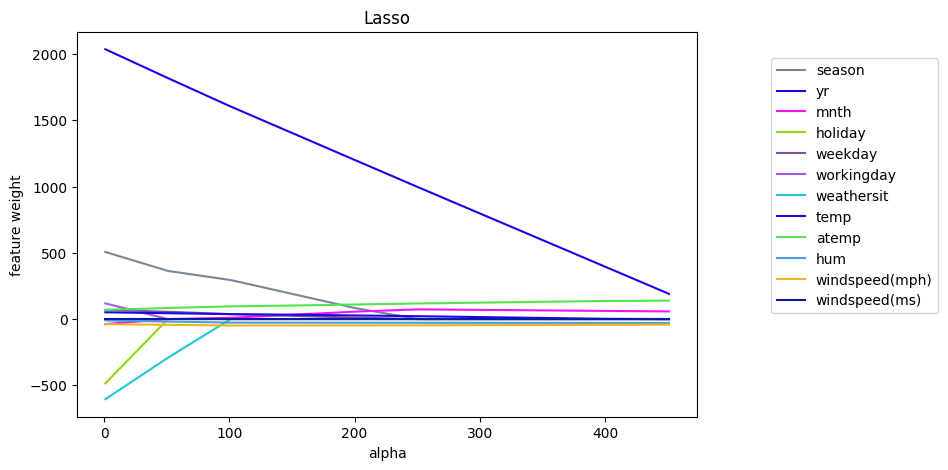

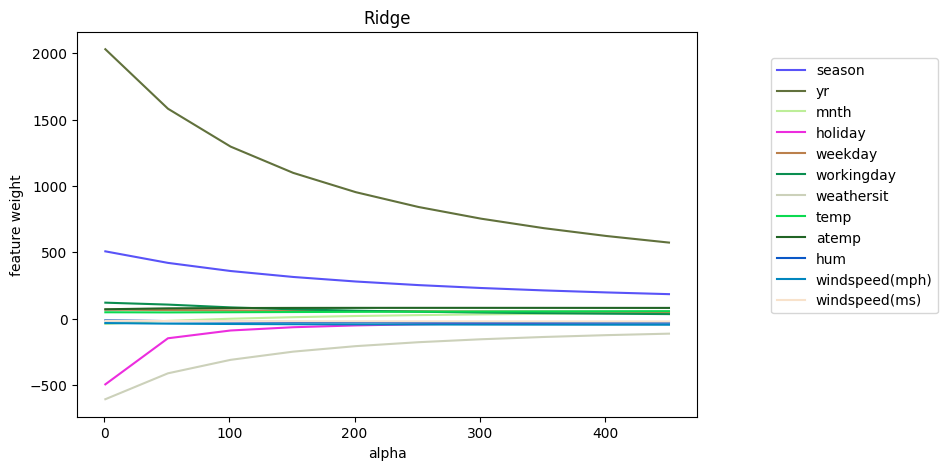

In [18]:
# Analyze the dynamics of weights as the regularization parameter increases:

plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Questions:

1. Which regularizer (Ridge or Lasso) reduces the weights more aggressively for the same alpha?
2. What happens to the Lasso scales if alpha is made too large? Explain why this happens.
3. Can we say that Lasso eliminates one of the windspeed features at any value of alpha > 0? What about Ridge? It is believed that a regularizer eliminates a feature if the coefficient is less than.
4. Which of the regularizers is suitable for selecting uninformative features?


Answers:

1. Lasso is more aggressive in reducing weights for the same alpha value compared to Ridge.
2. If you make alpha too large for Lasso, all feature weights will be reduced to almost zero. This is because Lasso uses L1 regularization, which adds the sum of the absolute values of the coefficients to the loss function. With a very large alpha, this sum becomes dominant, so the model tries to reduce all coefficients to a minimum.
3. For example, Lasso excludes one of the windspeed features at any value of alpha > 0. This is because Lasso, as we have already mentioned, uses L1 regularization, which causes feature selection by reducing some coefficients to zero. Ridge, on the other hand, does not exclude any feature because it uses L2 regularization, which does not zero out the coefficients.
4. Lasso is suitable for selecting uninformative features because it is able to zero out the coefficients of such features, which helps to reduce the dimensionality of the feature space and improve the generalizability of the model.

In [19]:
# TASK 8

def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = [e[0] for e in data]
    y = [e[1] for e in data]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=5)
regressor.fit(X, y)

LassoCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        cv=5)

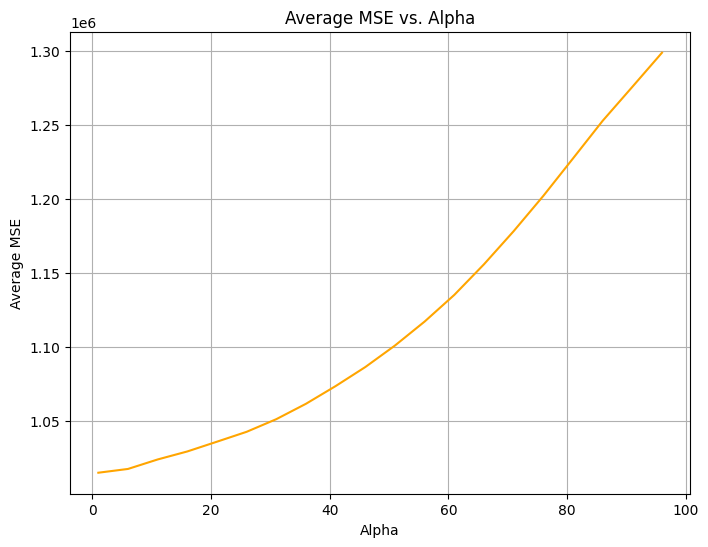

Selected alpha: 1
Feature-coefficient pairs: [('season', 506.5512786498074), ('yr', 2036.2316676979037), ('mnth', -38.07827028932167), ('holiday', -484.65194618654056), ('weekday', 68.93837479133958), ('workingday', 118.4475975866837), ('weathersit', -604.5667118927049), ('temp', 51.363260585616366), ('atemp', 69.91273749012187), ('hum', -10.352705204636573), ('windspeed(mph)', -38.34106761310847), ('windspeed(ms)', -0.0)]


In [26]:
# Graphing the row-averaged MSE depending on alpha
mse_avg = np.mean(regressor.mse_path_, axis=1)
data = list(zip(regressor.alphas_, mse_avg))
data = list(data)

plt.figure(figsize=(8, 6))
plt.plot(*zip(*data), color='orange')
plt.title("Average MSE vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Average MSE")
plt.grid(True)
plt.show()

# Displaying the selected alpha
print("Selected alpha:", regressor.alpha_)
# Print feature-coefficient pairs for the trained coefficient vector
coefficients = list(zip(df.columns, regressor.coef_))
print("Feature-coefficient pairs:", coefficients)

Alphas with minimum MSE: [51  1 96  1  1]


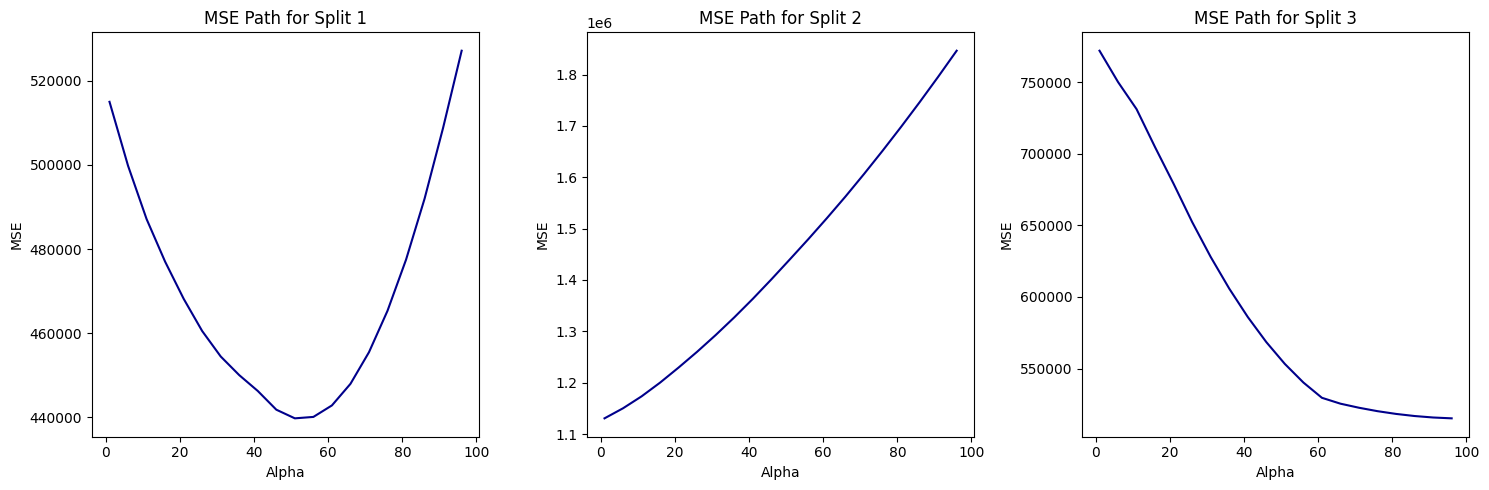

In [27]:
# TASK 9

min_alphas = regressor.alphas_[np.argmin(regressor.mse_path_, axis=0)]
print("Alphas with minimum MSE:", min_alphas)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axs[i].plot(regressor.alphas_, regressor.mse_path_[:, i], color='darkblue')
    axs[i].set_xlabel("Alpha")
    axs[i].set_ylabel("MSE")
    axs[i].set_title("MSE Path for Split {}".format(i+1))

plt.tight_layout()
plt.show()

**Task 10.**

Finally, as is customary in data analysis, let's interpret the results. Answer the following questions.

*Question 1.*

In the last trained model, select the 4 features with the largest (positive) coefficients (and write them out), look at the visualizations of the dependencies of cnt on these features that we showed in the "Getting to know the data" block. Does the graphs show an increasing linear dependence of cnt on these characteristics? Is it logical to assume (based on common sense) that the higher the value of these attributes, the more people will want to take bicycles?

*Answer:*

4 features with the highest positive coefficients:
- 'yr', 2036.2316676979037,
- 'season', 506.5512786498074,
- 'workingday', 118.4475975866837,
- 'atemp', 69.91273749012187

The higher the value of these attributes, the more people will want to take bicycles.

*Question 2*

Select the 3 attributes with the largest negative coefficients (and write them out) and look at the corresponding visualizations. Is there a decreasing linear relationship? Is it logical to say that the higher the value of these characteristics, the fewer people will want to take bicycles?

*Answer:*

3 features with the largest negative coefficients by absolute value:
- weathersit (weather favorability rating)
- windspeed(ms) (wind speed in meters per second)
- hum (humidity)

The higher the value of these attributes, the less people will want to take bicycles.


*Question 3*

Write out the features with coefficients close to zero (< 1e-3). Why do you think the model excluded them from the model (look at the graphs again)? Is it true that they have no effect on the demand for bicycles?

*Answer:*

Features with coefficients close to zero (< 1e-3):
- holiday
- weekday (day of the week)
- workingday

The model excluded these features because their influence on the target variable was likely to be very small.

***Conclusion.***

Thus, we have seen how to monitor the adequacy of a linear model, how to select features, and how to select the regularization factor correctly, without tuning to any particular portion of the data.

It's worth noting that cross-validation is convenient for selecting only a small number of parameters (1, 2, maximum 3), because for each possible combination of parameters, we have to train the model several times. This process takes a lot of time, especially if you need to train on large amounts of data.